# Introduction

In [ ]:
!python -m pip install polars
!python -m pip install matplotlib

In [1]:
import polars as pl

rides = pl.scan_parquet("rides.parquet")

rides.collect()

pick_up,drop_off,passengers,distance,fare
str,str,i32,i32,i32
"""Manhattan""","""Manhattan""",1,3,24
"""Queens""","""Manhattan""",1,19,75
"""Manhattan""","""Queens""",1,1,16
"""Queens""","""Manhattan""",0,9,60
"""Queens""","""Manhattan""",1,17,90
…,…,…,…,…
"""Manhattan""","""Manhattan""",null,5,27
"""Manhattan""","""Manhattan""",null,4,26
"""Queens""","""Brooklyn""",null,4,26


# How to Create a Polars LazyFrame

In [ ]:
import polars as pl

programming_languages = {
    "language_id": range(5),
    "language": ["Pascal", "C", "C++", "Python", "Java"],
    "creator": [
        "Niklaus Wirth",
        "Dennis Ritchie",
        "Bjarne Stroustrup",
        "Guido van Rossum",
        "James Gosling",
    ],
    "year": [1970, 1973, 1985, 1991, 1995],
}

pl.LazyFrame(programming_languages).collect()

language_id,language,creator,year
i64,str,str,i64
0,"""Pascal""","""Niklaus Wirth""",1970
1,"""C""","""Dennis Ritchie""",1973
2,"""C++""","""Bjarne Stroustrup""",1985
3,"""Python""","""Guido van Rossum""",1991
4,"""Java""","""James Gosling""",1995


In [ ]:
import polars as pl

programming_languages = {
    "language_id": range(5),
    "language": ["Pascal", "C", "C++", "Python", "Java"],
    "creator": [
        "Niklaus Wirth",
        "Dennis Ritchie",
        "Bjarne Stroustrup",
        "Guido van Rossum",
        "James Gosling",
    ],
    "year": [1970, 1973, 1985, 1991, 1995],
}

d_types = {
    "language_id": pl.Int32,
    "language": pl.String,
    "creator": pl.String,
    "year": pl.Int32,
}

languages = pl.LazyFrame(programming_languages, schema=d_types)
languages.collect()

language_id,language,creator,year
i32,str,str,i32
0,"""Pascal""","""Niklaus Wirth""",1970
1,"""C""","""Dennis Ritchie""",1973
2,"""C++""","""Bjarne Stroustrup""",1985
3,"""Python""","""Guido van Rossum""",1991
4,"""Java""","""James Gosling""",1995


In [5]:
languages.collect_schema()

Schema([('language_id', Int32),
        ('language', String),
        ('creator', String),
        ('year', Int32)])

In [ ]:
languages_df = pl.read_csv("programming_languages.csv")
type(languages_df)


languages_lf = languages_df.lazy()
type(languages_lf)

# How to Monitor LazyFrame Efficiency

In [ ]:
# dataframe_timer.py

import polars as pl
import time

start = time.perf_counter()

for _ in range(10):
    rides = pl.read_parquet("rides.parquet")
    result = (
        rides.filter(pl.col("pick_up") == pl.col("drop_off"))
        .group_by(pl.col("pick_up"))
        .agg(pl.col("fare").mean())
        .filter(
            pl.col("pick_up").is_in(
                ["Brooklyn", "Bronx", "Queens", "Manhattan"]
            )
        )
    )

end = time.perf_counter()

f"Code finished in {(end - start)/10:0.4f} seconds."

In [ ]:
# lazyframe_timer.py

import polars as pl
import time

start = time.perf_counter()

for _ in range(10):
    rides = pl.scan_parquet("rides.parquet")
    result = (
        rides.filter(pl.col("pick_up") == pl.col("drop_off"))
        .group_by(pl.col("pick_up"))
        .agg(pl.col("fare").mean())
        .filter(
            pl.col("pick_up").is_in(
                ["Brooklyn", "Bronx", "Queens", "Manhattan"]
            )
        )
    ).collect()

end = time.perf_counter()

f"Code finished in {(end - start)/10:0.4f} seconds."

# How LazyFrames Achieve Efficiency
## Investigating the Sub-Optimized Query Plan

In [8]:
import polars as pl

rides = pl.scan_parquet("rides.parquet")

print(
    (
        rides.filter(pl.col("pick_up") == pl.col("drop_off"))
        .group_by(pl.col("pick_up"))
        .agg(pl.col("fare").mean())
        .filter(
            pl.col("pick_up").is_in(
                ["Brooklyn", "Bronx", "Queens", "Manhattan"]
            )
        )
    ).explain(optimized=False)
)

FILTER col("pick_up").is_in([Series]) FROM
  AGGREGATE
  	[col("fare").mean()] BY [col("pick_up")] FROM
    FILTER [(col("pick_up")) == (col("drop_off"))] FROM
      Parquet SCAN [rides.parquet]
      PROJECT */5 COLUMNS


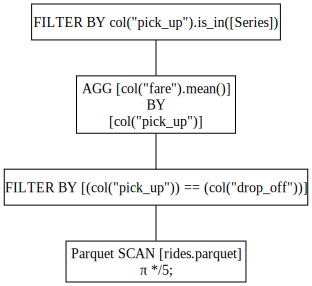

In [6]:
import polars as pl

rides = pl.scan_parquet("rides.parquet")

(
    rides.filter(pl.col("pick_up") == pl.col("drop_off"))
    .group_by(pl.col("pick_up"))
    .agg(pl.col("fare").mean())
    .filter(
        pl.col("pick_up").is_in(["Brooklyn", "Bronx", "Queens", "Manhattan"])
    )
).show_graph(optimized=False)

## Investigating the Optimized Query Plan

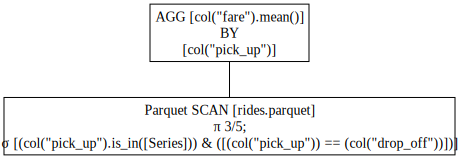

In [9]:
rides = pl.scan_parquet("rides.parquet")

(
    rides.filter(pl.col("pick_up") == pl.col("drop_off"))
    .group_by(pl.col("pick_up"))
    .agg(pl.col("fare").mean())
    .filter(
        pl.col("pick_up").is_in(["Brooklyn", "Bronx", "Queens", "Manhattan"])
    )
).show_graph(optimized=True)

In [10]:
rides.collect_schema()

Schema([('pick_up', String),
        ('drop_off', String),
        ('passengers', Int32),
        ('distance', Int32),
        ('fare', Int32)])

# How LazyFrames Cope With Large Volumes of Data
## Using Streaming to Deal With Large Volumes
This code may crash your computer. Please ensure you save everything before running it. Also, you should not run this code within a notebook. Notebooks have their own memory configuration that is separate from your computer.

In [5]:
import polars as pl

rides = pl.scan_csv("2021_Yellow_Taxi_Trip_Data.csv")

print(
    (
        rides.group_by(pl.col("PULocationID")).agg(
            pl.col("total_amount").sum()
        )
    ).collect(streaming=True)
)

'Code finished in 0.2538 seconds.'

## Deciding When Streaming Should Be Used

In [11]:
import polars as pl

rides = pl.scan_parquet("rides.parquet")

print(
    (
        rides.filter(pl.col("pick_up") == pl.col("drop_off"))
        .group_by(pl.col("pick_up"))
        .agg(pl.col("drop_off").mean())
        .filter(
            pl.col("pick_up").is_in(
                ["Brooklyn", "Bronx", "Queens", "Manhattan"]
            )
        )
    ).explain(streaming=True, optimized=True)
)

STREAMING:
  AGGREGATE
  	[col("drop_off").mean()] BY [col("pick_up")] FROM
    Parquet SCAN [rides.parquet]
    PROJECT 2/5 COLUMNS
    SELECTION: [(col("pick_up").is_in([Series])) & ([(col("pick_up")) == (col("drop_off"))])]


In [1]:
import polars as pl

rides = pl.scan_parquet("rides.parquet")

print(
    (
        rides.filter(pl.col("pick_up") == pl.col("drop_off")).with_columns(
            pl.col("fare").mean().over(pl.col("pick_up")).alias("mean fare")
        )
    ).explain(streaming=True, optimized=True)
)

 WITH_COLUMNS:
 [col("fare").mean().over([col("pick_up")]).alias("mean fare")] 
  STREAMING:
    Parquet SCAN [rides.parquet]
    PROJECT */5 COLUMNS
    SELECTION: [(col("pick_up")) == (col("drop_off"))]


# How to Decide if LazyFrames Are Indeed Suitable

In [13]:
import polars as pl

rides = pl.scan_parquet("rides.parquet")

rides.pivot(
    on="pick_up",
    index="drop_off",
    values="passengers",
    aggregate_function="sum",
)

AttributeError: 'LazyFrame' object has no attribute 'pivot'

In [14]:
(
    rides.collect().pivot(
        on="pick_up",
        index="drop_off",
        values="passengers",
        aggregate_function="sum",
    )
)

drop_off,Manhattan,Queens,Unknown,Brooklyn,N/A,Bronx,EWR,Staten Island
str,i32,i32,i32,i32,i32,i32,i32,i32
"""Manhattan""",3041648,256376,4686,9736,113,3749,14,11
"""Queens""",111178,115640,629,3442,148,830,1,3
"""Brooklyn""",68712,66116,333,18854,20,924,1,38
"""Bronx""",12006,10396,59,862,23,1785,null,null
"""Unknown""",9668,1016,7512,50,37,13,10,null
"""N/A""",6312,17630,66,146,2974,82,25,5
"""Staten Island""",346,718,2,90,null,null,null,45
"""EWR""",12759,806,27,47,131,6,1034,3


In [15]:
(
    rides.filter(pl.col("pick_up").is_in(["Brooklyn", "Bronx", "Queens"]))
    .filter(pl.col("drop_off").is_in(["Brooklyn", "Bronx", "Queens"]))
    .collect()
    .pivot(
        on="pick_up",
        index="drop_off",
        values="passengers",
        aggregate_function="sum",
    )
)

drop_off,Queens,Brooklyn,Bronx
str,i32,i32,i32
"""Brooklyn""",66116,18854,924
"""Queens""",115640,3442,830
"""Bronx""",10396,862,1785


In [16]:
(
    rides.filter(pl.col("pick_up").is_in(["Brooklyn", "Bronx", "Queens"]))
    .filter(pl.col("drop_off").is_in(["Brooklyn", "Bronx", "Queens"]))
    .collect()
    .pivot(
        on="pick_up",
        index="drop_off",
        values="passengers",
        aggregate_function="sum",
    )
    .lazy()
    .select(pl.max("*"))
).collect()

drop_off,Queens,Brooklyn,Bronx
str,i32,i32,i32
"""Queens""",115640,18854,1785


In [2]:
df_ops = set(x for x in dir(pl.DataFrame()) if not x.startswith("_"))
lazy_ops = set(x for x in dir(pl.LazyFrame()) if not x.startswith("_"))
print(sorted(df_ops - lazy_ops))

['corr', 'drop_in_place', 'equals', 'estimated_size', 'extend', 'flags', 'fold', 'get_column', 'get_column_index', 'get_columns', 'glimpse', 'hash_rows', 'height', 'hstack', 'insert_column', 'is_duplicated', 'is_empty', 'is_unique', 'item', 'iter_columns', 'iter_rows', 'iter_slices', 'map_rows', 'max_horizontal', 'mean_horizontal', 'min_horizontal', 'n_chunks', 'n_unique', 'partition_by', 'pivot', 'plot', 'product', 'rechunk', 'replace_column', 'row', 'rows', 'rows_by_key', 'sample', 'shape', 'shrink_to_fit', 'style', 'sum_horizontal', 'to_arrow', 'to_dict', 'to_dicts', 'to_dummies', 'to_init_repr', 'to_jax', 'to_numpy', 'to_pandas', 'to_series', 'to_struct', 'to_torch', 'transpose', 'unstack', 'upsample', 'vstack', 'write_avro', 'write_clipboard', 'write_csv', 'write_database', 'write_delta', 'write_excel', 'write_ipc', 'write_ipc_stream', 'write_json', 'write_ndjson', 'write_parquet']
